# Code/Graph Progress
1. DONE
2. DONE
3. DONE
4. DONE
5. DONE
6. DONE
7. DONE
8. DONE
9. N/A

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# LOAD DATA


In [60]:
side_data = pd.read_csv('460lab2abx_others.csv', header=[0, 1]) # read in data with multiindex

# Velocity data from sheet in lab
velocities = np.array([99.8522, 99.4136, 99.7461, 100.087,\
                       100.496, 100.147, 99.852, 100.09,\
                       99.182, 100.488, 100.008, 100.305,\
                       99.2348, 99.7946, 99.7679, 99.9649,\
                       100.2841, 100.357, 100.291, 100.147,\
                       99.837, 99.7161, 99.4411])

side_data[('Velocity', '[ft/s]')] = velocities
side_data.sort_values(by=[(' AOA', ' [deg]')], inplace=True)
side_data.drop_duplicates(subset=(' AOA', ' [deg]'), inplace=True)
side_data.drop(index=1, inplace=True) # dropping the row associated with aoa = -8 as it messes up the scale on the data
# side_data

In [61]:
main_data = pd.read_csv('460lab2abx_taps.csv', header=[0, 1])
main_data.drop('x/c', axis=1, level=0, inplace=True)
main_data.drop(main_data.columns[[-1]], axis=1, inplace=True) # dropping last column because it is not read in properly for some reason
main_data.drop(index=1, inplace=True) # dropping the row associated with aoa = -8
main_data.sort_values(by=(' AOA', ' [deg]'), inplace=True)
main_data.drop_duplicates(subset=(' AOA', ' [deg]'), inplace=True)

aoas = main_data[' AOA'].values

# main_data

Plotting the tap cordinates for sanity check

In [62]:

# xs = []
# ys = []
# preasures = []
# for i, col in enumerate(main_data.columns.values[1:]):
#     xs.append(float(col[0]))
#     ys.append(float(col[1]))
# xs.append(xs[0])
# ys.append(ys[0])
# for i, row in enumerate(aoas):
#     p = main_data.iloc[i, 1:].values.flatten().tolist()
#     preasures.append(p)
# preasures = np.array(preasures)

# plt.figure(figsize=(10, 6))
# plt.plot(xs, ys, marker='o', linestyle='-')
# for i, txt in enumerate(zip(xs, ys)):
#     plt.annotate(f'({txt[0]}, {txt[1]})', (xs[i], ys[i]), textcoords="offset points", xytext=(0,10), ha='center')
# plt.xlabel('X values')
# plt.ylabel('Y values')
# plt.title('Plot of xs and ys with labels')
# plt.grid(True)
# plt.show()

# # delting from global namespace because the data was manipulated to produce a good plot
# # these should not be use because they do not represent the read data
# del([xs, ys])

# Question 1

In [63]:
coords = np.array(main_data.columns.values[1:]) # Excludes the aoa column
print(coords)
pressure_data = main_data.iloc[:, 1:].values # Excludes the aoa column
# pressure_data = pressure_data
# pressure_data.shape, coords.shape
# q_corrected = side_data[' q_WT corrected'].values[1:]
q_corrected = side_data[' q_WT corrected'].values
Cns = []
Cas = []
Cm_LExs = []
Cm_LEys = []
Cls = []
Cmc4 = []
for i, aoa in enumerate(aoas.flatten()):
    cn_temp = 0.0
    ca_temp = 0.0
    cm_LEx = 0.0
    cm_LEy = 0.0
    for j, tap_coord in enumerate(coords[:len(coords) - 1]):
        x, y = tap_coord
        x = float(x)
        y = float(y)
        p = pressure_data[i, j]
        cp = p / q_corrected[i]
        cp1 = pressure_data[i, j + 1] / q_corrected[i]
        cn_temp += 0.5 * (cp + cp1) * (float(coords[j+1][0]) - x)
        ca_temp += 0.5 * (cp + cp1) * (float(coords[j+1][1]) - y)
        cm_LEx += 0.5 * (cp*x + cp1 * float(coords[j+1][0])) * (x- float(coords[j+1][0]))
        cm_LEy += 0.5 * (cp*y + cp1 * float(coords[j+1][1])) * (y- float(coords[j+1][1]))

    Cns.append(cn_temp)
    Cas.append(-ca_temp)
    Cm_LExs.append(cm_LEx)
    Cm_LEys.append(cm_LEy)
    Cls.append(cn_temp * np.cos(np.radians(aoa)) - ca_temp * np.sin(np.radians(aoa)))
    Cmc4.append(cm_LEx + cm_LEy + 0.25*Cls[-1])

Cns = np.array(Cns)
Cas = np.array(Cas)
Cm_LExs = np.array(Cm_LExs)
Cm_LEys = np.array(Cm_LEys)
Cls = np.array(Cls)
Cmc4 = np.array(Cmc4)


# Create a dictionary with the calculated data
data_dict = {
    'AOA [deg]': aoas.flatten(),
    'Cn': Cns.flatten(),
    'Ca': Cas.flatten(),
    'Cm_LEx': Cm_LExs.flatten(),
    'Cm_LEy': Cm_LEys.flatten(),
    'Cl': Cls.flatten(),
    'Cm_c/4': Cmc4.flatten()
}

# Create a DataFrame from the dictionary
calculated_data_df = pd.DataFrame(data_dict)

# Set the angle of attack as the index
calculated_data_df.set_index('AOA [deg]', inplace=True)

# Display the DataFrame
calculated_data_df

[('1', '0') ('0.8', '0.05248') ('0.7', '0.073468') ('0.6', '0.090605')
 ('0.5', '0.102701') ('0.4', '0.109032') ('0.3', '0.108445')
 ('0.2', '0.10036') ('0.1', '0.075339') ('0.05', '0.052949') ('0', '0')
 ('0.05', '-0.03115') ('0.1', '-0.03513') ('0.2', '-0.03548')
 ('0.3', '-0.03146') ('0.4', '-0.02707') ('0.5', '-0.02268')
 ('0.6', '-0.01828') ('0.7', '-0.01389') ('0.8', '-0.0095')]


,Cn,Ca,Cm_LEx,Cm_LEy,Cl,Cm_c/4
AOA [deg],,,,,,
-6.0,-0.014152,0.041868,-0.017150,0.001906,-0.018451,-0.019857
-4.0,0.134977,0.048429,-0.072006,0.001155,0.131270,-0.038033
-2.0,0.272230,0.045550,-0.114147,0.000124,0.270474,-0.046404
0.0,0.441696,0.029247,-0.166653,-0.001298,0.441696,-0.057527
2.0,0.614011,0.003578,-0.224711,-0.002750,0.613762,-0.074021
4.0,0.773583,-0.026630,-0.274905,-0.004333,0.769841,-0.086777
6.0,0.939348,-0.067638,-0.326669,-0.006125,0.927132,-0.101011
8.0,1.066426,-0.117156,-0.359581,-0.007927,1.039742,-0.107572
10.0,1.187120,-0.168946,-0.392057,-0.009550,1.139748,-0.116670


In [64]:
calculated_data_df.to_latex()

'\\begin{tabular}{lrrrrrr}\n\\toprule\n & Cn & Ca & Cm_LEx & Cm_LEy & Cl & Cm_c/4 \\\\\nAOA [deg] &  &  &  &  &  &  \\\\\n\\midrule\n-6.000000 & -0.014152 & 0.041868 & -0.017150 & 0.001906 & -0.018451 & -0.019857 \\\\\n-4.000000 & 0.134977 & 0.048429 & -0.072006 & 0.001155 & 0.131270 & -0.038033 \\\\\n-2.000000 & 0.272230 & 0.045550 & -0.114147 & 0.000124 & 0.270474 & -0.046404 \\\\\n0.000000 & 0.441696 & 0.029247 & -0.166653 & -0.001298 & 0.441696 & -0.057527 \\\\\n2.000000 & 0.614011 & 0.003578 & -0.224711 & -0.002750 & 0.613762 & -0.074021 \\\\\n4.000000 & 0.773583 & -0.026630 & -0.274905 & -0.004333 & 0.769841 & -0.086777 \\\\\n6.000000 & 0.939348 & -0.067638 & -0.326669 & -0.006125 & 0.927132 & -0.101011 \\\\\n8.000000 & 1.066426 & -0.117156 & -0.359581 & -0.007927 & 1.039742 & -0.107572 \\\\\n10.000000 & 1.187120 & -0.168946 & -0.392057 & -0.009550 & 1.139748 & -0.116670 \\\\\n12.000000 & 1.240037 & -0.208835 & -0.406901 & -0.010581 & 1.169520 & -0.125102 \\\\\n14.000000 & 1.2787

# Question 2

In [65]:
data = side_data.copy()

chord_length = 3.5 / 12 # convert inches to feet

# density caluculated using ideal gas law
density = (side_data[' AmbPress'].values*144) / (1716 * side_data[' AmbTemp'].values)
V = side_data['Velocity'].values

# viscocity calculated using fomula from Prof Merret's 442 lecture slides
viscocity = (2.2697e-8 * side_data[' AmbTemp'].values**(3/2)) / (side_data[' AmbTemp'].values + 198.72)
R = (density * V * chord_length) / viscocity
data[('Calculated Reynolds #', '[ND]')] = R

mach = side_data['Velocity'].values / (np.sqrt(1.4*1716*side_data[' AmbTemp'].values))
data[('Mach Number', '[ND]')] = mach

data.drop(columns=data.columns[2:5], inplace=True)

data

,AOA,q_WT corrected,Reynolds #,Velocity,Calculated Reynolds #,Mach Number
,[deg],[psid],[ND],[ft/s],[ND],[ND]
0,-6.0,0.078503,173683.5313,99.8522,173681.830785,0.088460
2,-4.0,0.077843,172951.9219,99.7461,173497.281599,0.088366
3,-2.0,0.078539,173722.6094,100.0870,174090.239351,0.088668
4,0.0,0.080270,175627.2344,100.4960,174801.649503,0.089030
5,2.0,0.076241,171162.1719,100.1470,174194.602699,0.088721
6,4.0,0.079710,175013.7031,99.8520,173681.482907,0.088460
7,6.0,0.080170,175517.8594,100.0900,174095.457519,0.088670
8,8.0,0.077478,172545.9688,99.1820,172516.092193,0.087866
9,10.0,0.079506,174788.6094,100.4880,174787.734390,0.089023


In [66]:
# Calculate the error
error = np.abs(data[(' Reynolds #', ' [ND]')].values - data[('Calculated Reynolds #', '[ND]')].values)

# Calculate the average percent difference
average_percent_difference = np.mean((error / data[(' Reynolds #', ' [ND]')].values) * 100)

# Print the results
print(f"Error: {error}")
print(f"Average Percent Difference: {average_percent_difference:.2f}%")

Error: [1.70051524e+00 5.45359699e+02 3.67629951e+02 8.25584897e+02
 3.03243080e+03 1.33222019e+03 1.42240188e+03 2.98766068e+01
 8.75009581e-01 2.04738957e+00 2.58941945e+00 1.70866100e+00
 1.13459517e+03 1.71257515e+00 1.73208452e+00 1.76851848e+00
 1.76434434e+03 8.48952164e-01 2.18808495e+00]
Average Percent Difference: 0.32%


In [67]:
# Setup for following questions
coords = np.array(main_data.columns.values[1:])
Cps_top = []
Cps_bottom = []

for i, aoa in enumerate(aoas.flatten()):
    cp_temp_top = []
    cp_temp_bottom = []
    for j, tap_coord in enumerate(coords):
        x, y = tap_coord
        x = float(x)
        y = float(y)
        p = pressure_data[i, j]
        cp = p / q_corrected[i]
        if y >= 0:
            cp_temp_top.append(cp)
        else:
            cp_temp_bottom.append(cp)
    Cps_top.append(cp_temp_top)
    Cps_bottom.append(cp_temp_bottom)

Cps_top = np.array(Cps_top)
Cps_bottom = np.array(Cps_bottom)



# Question 3

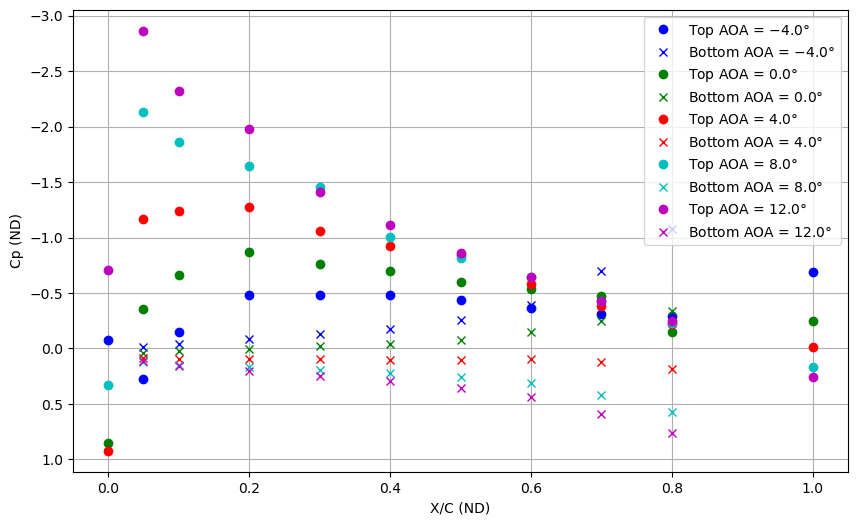

In [68]:
# Define the angles of attack to plot
aoa_idxs_to_plot = [1, 3, 5, 7, 9]
# translate to aoas[-4  0  4 8  12]

# Define a list of colors for each AOA
colors = ['b', 'g', 'r', 'c', 'm']

# Create a figure
plt.figure(figsize=(10, 6))

# Plot Cp values for the specified AOA indexes
for i, idx in enumerate(aoa_idxs_to_plot):
    color = colors[i % len(colors)]
    plt.plot([float(coord[0]) for coord in coords if float(coord[1]) >= 0], Cps_top[idx], marker='o', linestyle='', color=color, label=f'Top AOA = ${aoas[idx][0]}\degree$')
    plt.plot([float(coord[0]) for coord in coords if float(coord[1]) < 0], Cps_bottom[idx], marker='x', linestyle='', color=color, label=f'Bottom AOA = ${aoas[idx][0]}\degree$')

plt.xlabel('X/C (ND)')
plt.ylabel('Cp (ND)')
plt.gca().yaxis.set_inverted(True)
# plt.title('Cp vs x/c for different AOAs')
plt.legend()
plt.grid(True)
plt.show()

# Question 4

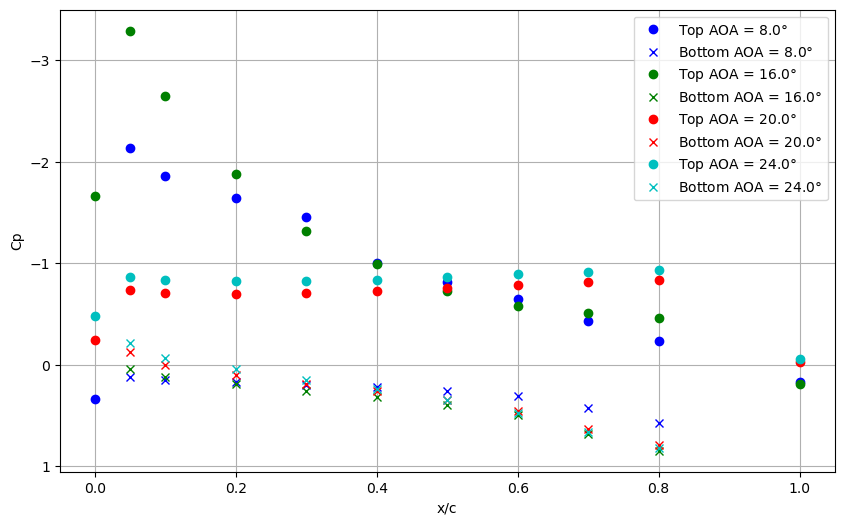

In [69]:
# Define the angles of attack to plot
aoas_to_plot = [8, 16, 20, 24]

# Find the indices corresponding to the specified angles of attack
aoa_indices = [np.where(aoas.flatten() == aoa)[0][0] for aoa in aoas_to_plot]

# Create a figure
plt.figure(figsize=(10, 6))

# Plot Cp values for the specified AOA indexes
for i, idx in enumerate(aoa_indices):
    color = colors[i % len(colors)]
    plt.plot([float(coord[0]) for coord in coords if float(coord[1]) >= 0], Cps_top[idx], marker='o', linestyle='', color=color, label=f'Top AOA = ${aoas[idx][0]}\degree$')
    plt.plot([float(coord[0]) for coord in coords if float(coord[1]) < 0], Cps_bottom[idx], marker='x', linestyle='', color=color, label=f'Bottom AOA = ${aoas[idx][0]}\degree$')

plt.xlabel('x/c')
plt.ylabel('Cp')
plt.gca().yaxis.set_inverted(True)
# plt.title('Cp vs x/c for different AOAs')
plt.legend()
plt.grid(True)
plt.show()

# Question 5

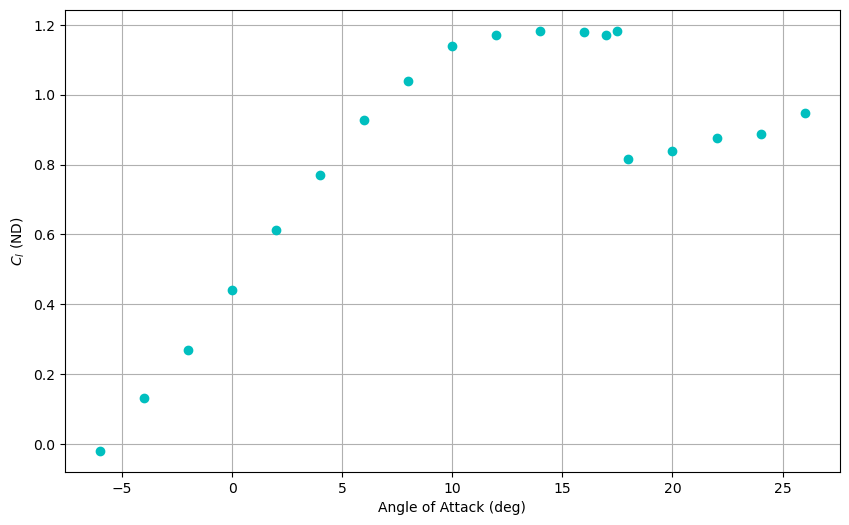

In [70]:
plt.figure(figsize=(10, 6))
plt.plot(aoas.flatten(), Cls, marker='o', linestyle='', color='c', label='$C_l$')
plt.xlabel('Angle of Attack (deg)')
plt.ylabel('$C_l$ (ND)')
# plt.title('$C_l$ vs AOA') # TODO: REMOVE BEFORE FLIGHT
# plt.legend()
plt.grid(True)
plt.show()

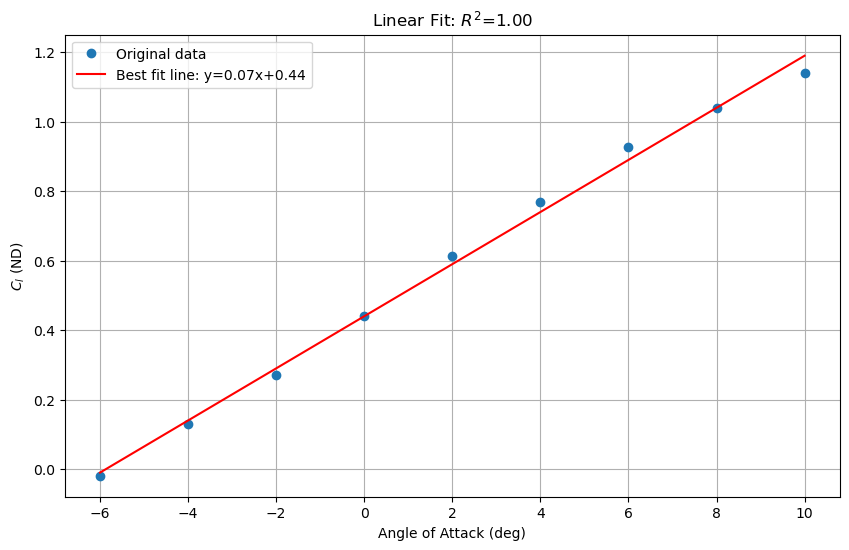

Slope: 0.07
Intercept: 0.44
R-squared: 1.00


In [71]:
from scipy.stats import linregress

# Extract the data up to an angle of attack of 10 degrees
aoa_up_to_10 = aoas.flatten()[:9]  # Angles of attack up to 10 degrees
Cl_up_to_10 = Cls.flatten()[:9]    # Corresponding Cl values

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(aoa_up_to_10, Cl_up_to_10)

# Generate the best fit line
best_fit_line = slope * aoa_up_to_10 + intercept

# Plot the data and the best fit line
plt.figure(figsize=(10, 6))
plt.plot(aoa_up_to_10, Cl_up_to_10, 'o', label='Original data')
plt.plot(aoa_up_to_10, best_fit_line, 'r', label=f'Best fit line: y={slope:.2f}x+{intercept:.2f}')
plt.xlabel('Angle of Attack (deg)')
plt.ylabel('$C_l$ (ND)')
plt.legend()
plt.grid(True)
plt.title(f'Linear Fit: $R^2$={r_value**2:.2f}')
plt.show()

# Print the slope, intercept, and R-squared value
print(f'Slope: {slope:.2f}')
print(f'Intercept: {intercept:.2f}')
print(f'R-squared: {r_value**2:.2f}')

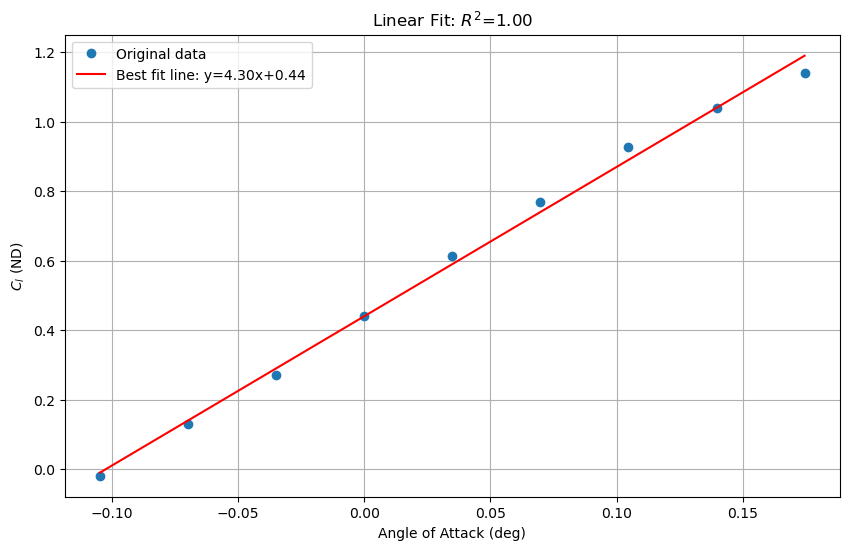

Slope: 4.30
Intercept: 0.44
R-squared: 1.00


In [72]:
from scipy.stats import linregress

# Extract the data up to an angle of attack of 10 degrees
aoa_up_to_10 = np.radians(aoas.flatten()[:9])  # Angles of attack up to 10 degrees
Cl_up_to_10 = Cls.flatten()[:9]    # Corresponding Cl values

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(aoa_up_to_10, Cl_up_to_10)

# Generate the best fit line
best_fit_line = slope * aoa_up_to_10 + intercept

# Plot the data and the best fit line
plt.figure(figsize=(10, 6))
plt.plot(aoa_up_to_10, Cl_up_to_10, 'o', label='Original data')
plt.plot(aoa_up_to_10, best_fit_line, 'r', label=f'Best fit line: y={slope:.2f}x+{intercept:.2f}')
plt.xlabel('Angle of Attack (deg)')
plt.ylabel('$C_l$ (ND)')
plt.legend()
plt.grid(True)
plt.title(f'Linear Fit: $R^2$={r_value**2:.2f}')
plt.show()

# Print the slope, intercept, and R-squared value
print(f'Slope: {slope:.2f}')
print(f'Intercept: {intercept:.2f}')
print(f'R-squared: {r_value**2:.2f}')

# Question 6

Graphs for Question 6, plot 1 is 100,000 and plot 2 is 200,000 \
Our data is roughly 175,000

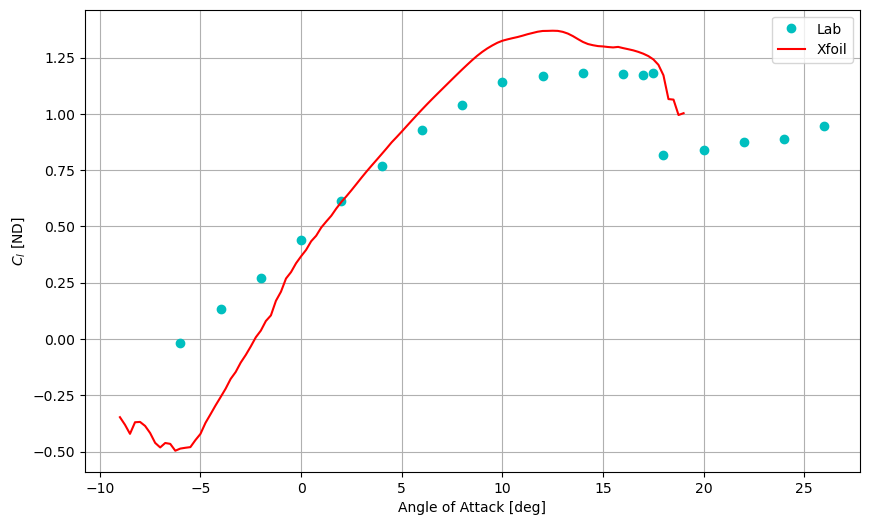

In [73]:
# Data from http://airfoiltools.com/polar/details?polar=xf-clarky-il-100000
# Taken at reynolds 100,000, our data is at reynolds number 175,000
xfoil_data_clarky = pd.read_csv('xf-clarky-il-100000.csv', skiprows=10)
plt.figure(figsize=(10, 6))
plt.plot(aoas.flatten(), Cls, marker='o', linestyle='', color='c', label='Lab')
plt.plot(xfoil_data_clarky['Alpha'], xfoil_data_clarky['Cl'], color='r', label='Xfoil')
plt.xlabel('Angle of Attack [deg]')
plt.ylabel('$C_l$ [ND]')
plt.legend()
plt.grid(True)
plt.show()

Closer Reynolds number use this data

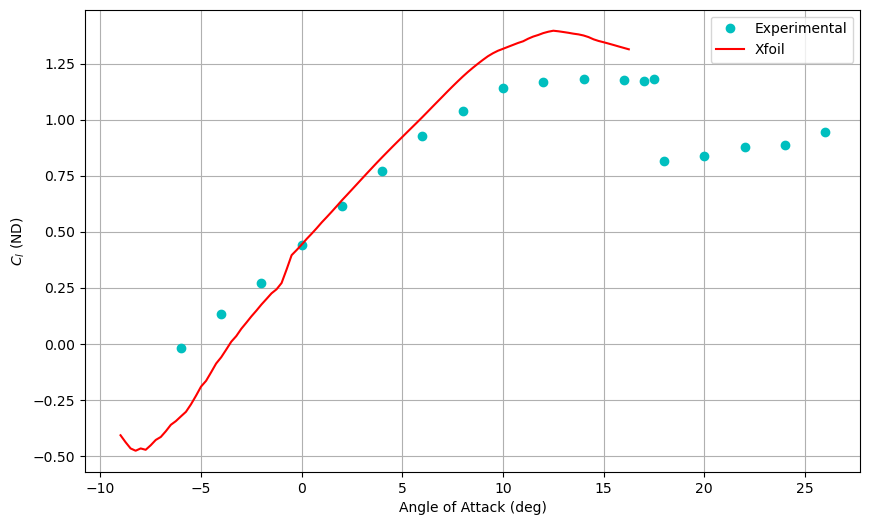

In [74]:
# Data from http://airfoiltools.com/polar/details?polar=xf-clarky-il-200000
# Taken at reynolds 200,000, our data is at reynolds number 175,000
xfoil_data_clarky = pd.read_csv('xf-clarky-il-200000.csv', skiprows=10)
plt.figure(figsize=(10, 6))
plt.plot(aoas.flatten(), Cls, marker='o', linestyle='', color='c', label='Experimental')
plt.plot(xfoil_data_clarky['Alpha'], xfoil_data_clarky['Cl'], color='r', label='Xfoil')
plt.xlabel('Angle of Attack (deg)')
plt.ylabel('$C_l$ (ND)')
plt.legend()
plt.grid(True)
# plt.title("C_l vs alpha from xfoil at r=200000") # TODO: Remove before flight
plt.show()

# Question 7

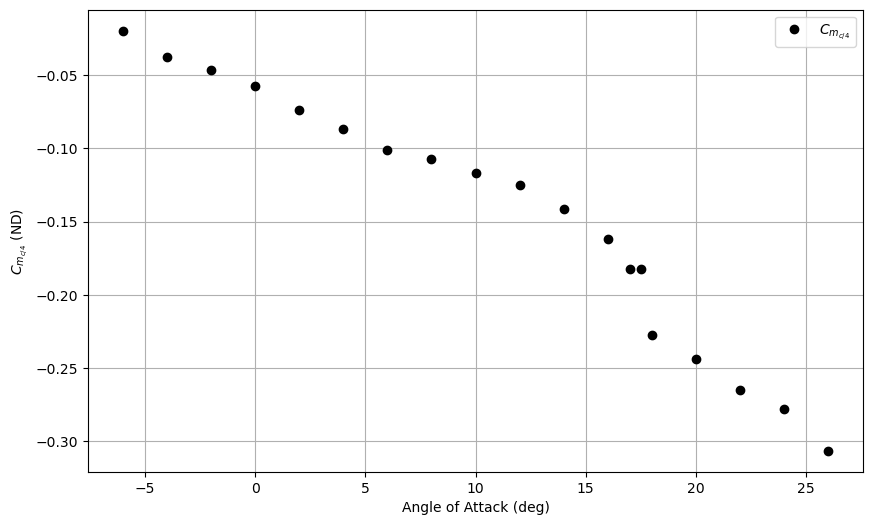

In [75]:
plt.figure(figsize=(10, 6))
plt.plot(aoas.flatten(), Cmc4, marker='o', linestyle='', color='k', label='$C_{m_{c/4}}$')
plt.xlabel('Angle of Attack (deg)')
plt.ylabel('$C_{m_{c/4}}$ (ND)')
# plt.title('$C_{m_{c/4}}$ vs AOA')
plt.legend()
plt.grid(True)
plt.show()

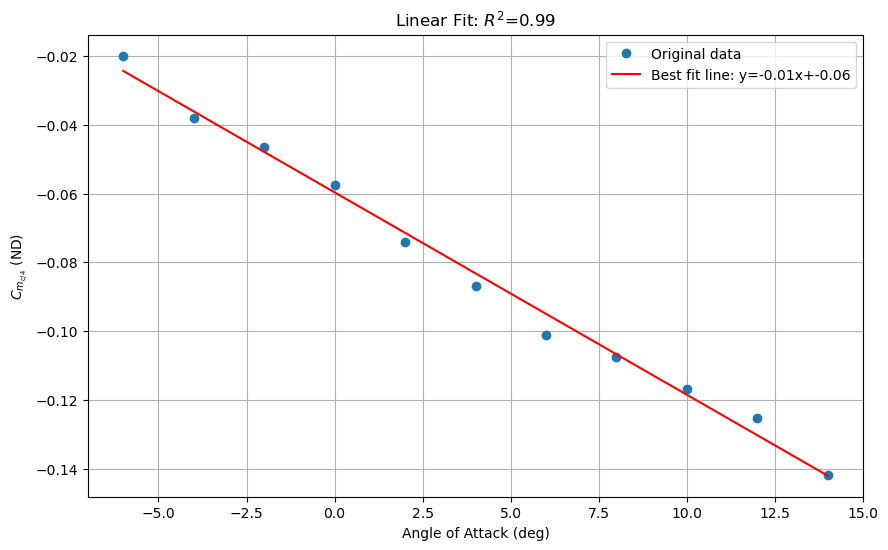

Slope: -0.01
Intercept: -0.06
R-squared: 0.99


In [80]:
from scipy.stats import linregress

# Extract the data up to an angle of attack of 15 degrees
aoa_up_to_15 = aoas.flatten()[:11]  # Angles of attack up to 15 degrees
Cm_c4_up_to_15 = Cmc4.flatten()[:11]  # Corresponding Cm_c/4 values

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(aoa_up_to_15, Cm_c4_up_to_15)

# Generate the best fit line
best_fit_line = slope * aoa_up_to_15 + intercept

# Plot the data and the best fit line
plt.figure(figsize=(10, 6))
plt.plot(aoa_up_to_15, Cm_c4_up_to_15, 'o', label='Original data')
plt.plot(aoa_up_to_15, best_fit_line, 'r', label=f'Best fit line: y={slope:.2f}x+{intercept:.2f}')
plt.xlabel('Angle of Attack (deg)')
plt.ylabel('$C_{m_{c/4}}$ (ND)')
plt.legend()
plt.grid(True)
plt.title(f'Linear Fit: $R^2$={r_value**2:.2f}')
plt.show()

# Print the slope, intercept, and R-squared value
print(f'Slope: {slope:.2f}')
print(f'Intercept: {intercept:.2f}')
print(f'R-squared: {r_value**2:.2f}')

# Question 8

Used NACA 2412 and NACA 0012 (Symetric)

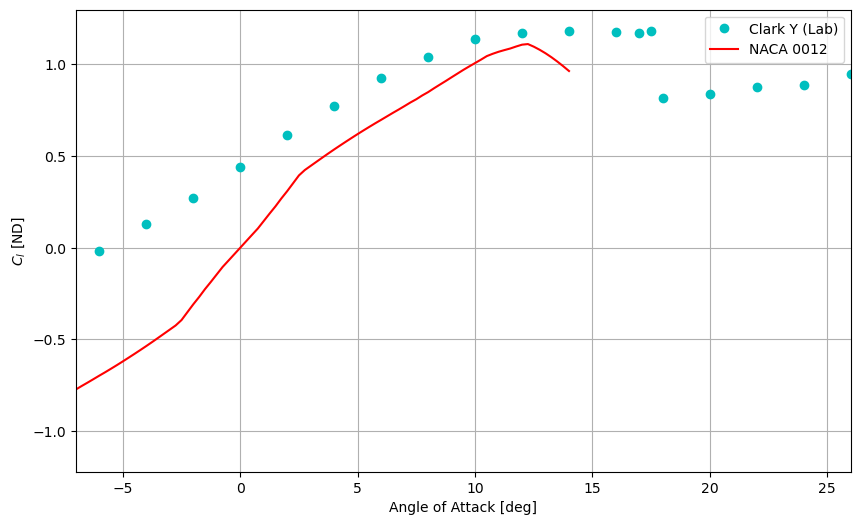

In [76]:
# Data from airfoil tools http://www.airfoiltools.com/polar/details?polar=xf-n0012-il-200000
xfoil_data_0012 = pd.read_csv('xf-n0012-il-200000.csv', skiprows=10)
plt.figure(figsize=(10, 6))
plt.plot(aoas.flatten(), Cls, marker='o', linestyle='', color='c', label='Clark Y (Lab)')
plt.plot(xfoil_data_0012['Alpha'], xfoil_data_0012['Cl'], color='r', label='NACA 0012')
plt.xlabel('Angle of Attack [deg]')
plt.ylabel('$C_l$ [ND]')
plt.xlim(-7, 26)
plt.legend()
plt.grid(True)
# plt.title("C_l vs alpha from naca0012 at r=200000") # TODO: Remove before flight
plt.show()

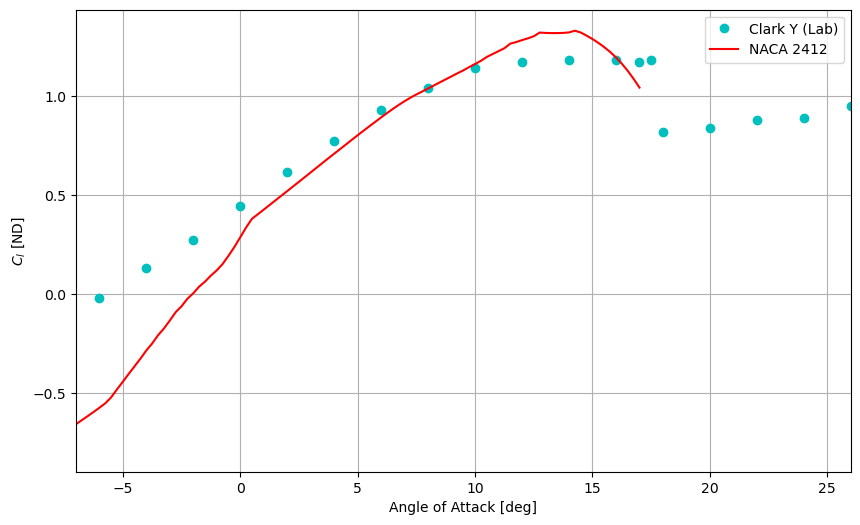

In [77]:
# Dara from airfoil tools http://airfoiltools.com/polar/details?polar=xf-naca2412-il-200000
xfoil_data_2412 = pd.read_csv('xf-naca2412-il-200000.csv', skiprows=10)
plt.figure(figsize=(10, 6))
plt.plot(aoas.flatten(), Cls, marker='o', linestyle='', color='c', label='Clark Y (Lab)')
plt.plot(xfoil_data_2412['Alpha'], xfoil_data_2412['Cl'], color='r', label='NACA 2412')
plt.xlabel('Angle of Attack [deg]')
plt.ylabel('$C_l$ [ND]')
plt.xlim(-7, 26)
plt.legend()
plt.grid(True)
# plt.title("C_l vs alpha from naca2412 at r=200000") # TODO: Remove before flight
plt.show()

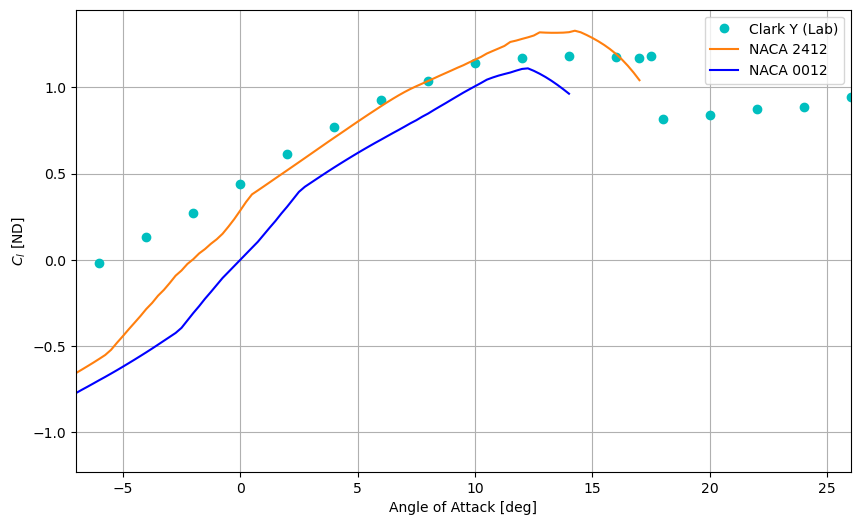

In [78]:
xfoil_data_0012 = pd.read_csv('xf-n0012-il-200000.csv', skiprows=10)
xfoil_data_2412 = pd.read_csv('xf-naca2412-il-200000.csv', skiprows=10)
plt.figure(figsize=(10, 6))
plt.plot(aoas.flatten(), Cls, marker='o', linestyle='', color='c', label='Clark Y (Lab)')
plt.plot(xfoil_data_2412['Alpha'], xfoil_data_2412['Cl'], color='tab:orange', label='NACA 2412')
plt.plot(xfoil_data_0012['Alpha'], xfoil_data_0012['Cl'], color='b', label='NACA 0012')
plt.xlabel('Angle of Attack [deg]')
plt.xlim(-7, 26)
plt.ylabel('$C_l$ [ND]')
plt.legend()
plt.grid(True)
# plt.title("C_l vs alpha from naca2412 at r=200000") # TODO: Remove before flight
plt.show()

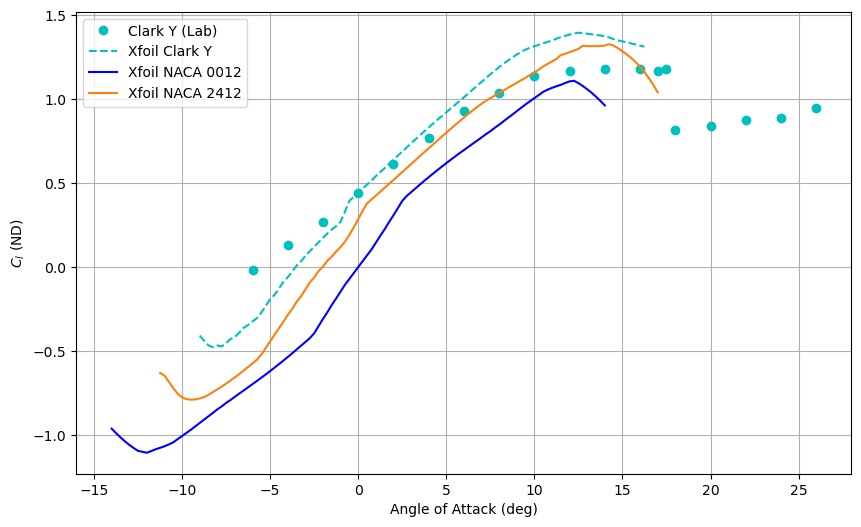

In [99]:

# Data from airfoil tools
xfoil_data_0012 = pd.read_csv('xf-n0012-il-200000.csv', skiprows=10)
xfoil_data_2412 = pd.read_csv('xf-naca2412-il-200000.csv', skiprows=10)
xfoil_data_clarky_100k = pd.read_csv('xf-clarky-il-100000.csv', skiprows=10)
xfoil_data_clarky_200k = pd.read_csv('xf-clarky-il-200000.csv', skiprows=10)

plt.figure(figsize=(10, 6))

# Plot experimental data
plt.plot(aoas.flatten(), Cls, marker='o', linestyle='', color='c', label='Clark Y (Lab)')

# Plot XFOIL data
plt.plot(xfoil_data_clarky_200k['Alpha'], xfoil_data_clarky_200k['Cl'], linestyle='--', color='c', label='Xfoil Clark Y')
plt.plot(xfoil_data_0012['Alpha'], xfoil_data_0012['Cl'], linestyle='-', color='b', label='Xfoil NACA 0012')
plt.plot(xfoil_data_2412['Alpha'], xfoil_data_2412['Cl'], linestyle='-', color='tab:orange', label='Xfoil NACA 2412')


plt.xlabel('Angle of Attack (deg)')
plt.ylabel('$C_l$ (ND)')
# plt.xlim(-7, 26)
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

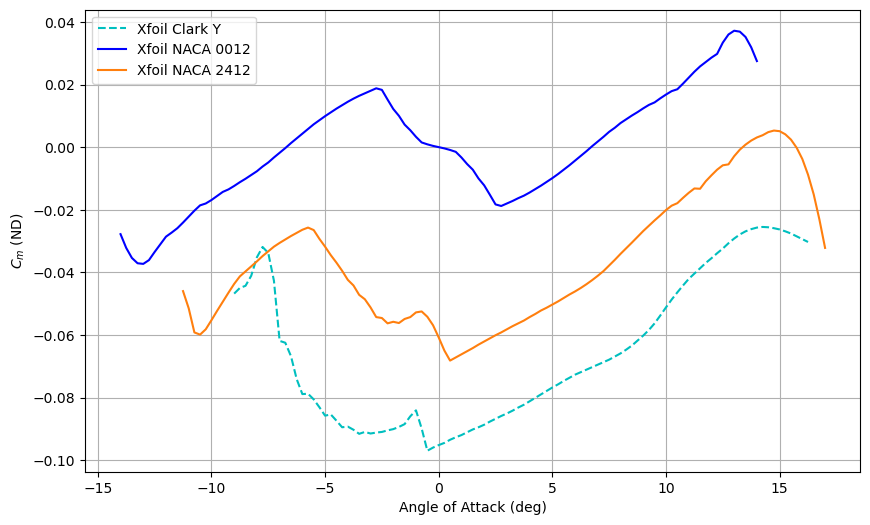

In [103]:
# Data from airfoil tools
xfoil_data_0012 = pd.read_csv('xf-n0012-il-200000.csv', skiprows=10)
xfoil_data_2412 = pd.read_csv('xf-naca2412-il-200000.csv', skiprows=10)
xfoil_data_clarky_200k = pd.read_csv('xf-clarky-il-200000.csv', skiprows=10)

plt.figure(figsize=(10, 6))

# Plot XFOIL data
plt.plot(xfoil_data_clarky_200k['Alpha'], xfoil_data_clarky_200k['Cm'], linestyle='--', color='c', label='Xfoil Clark Y')
plt.plot(xfoil_data_0012['Alpha'], xfoil_data_0012['Cm'], linestyle='-', color='b', label='Xfoil NACA 0012')
plt.plot(xfoil_data_2412['Alpha'], xfoil_data_2412['Cm'], linestyle='-', color='tab:orange', label='Xfoil NACA 2412')

plt.xlabel('Angle of Attack (deg)')
plt.ylabel('$C_{m}$ (ND)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Appendix: Plots for everything

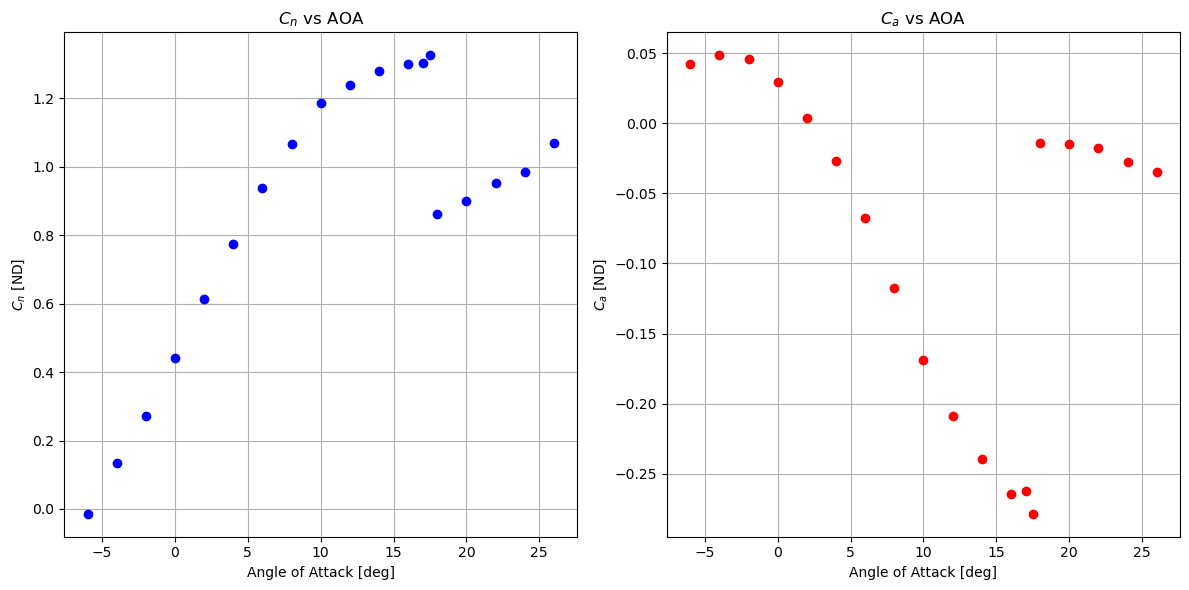

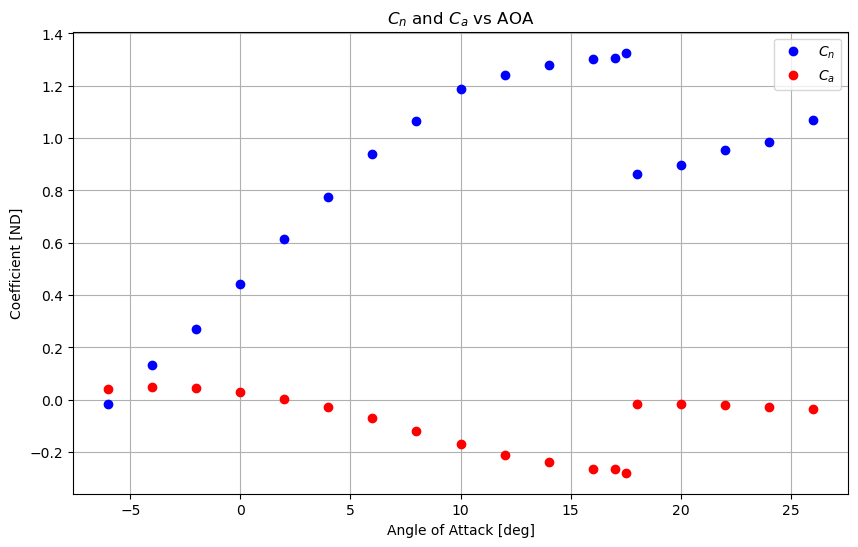

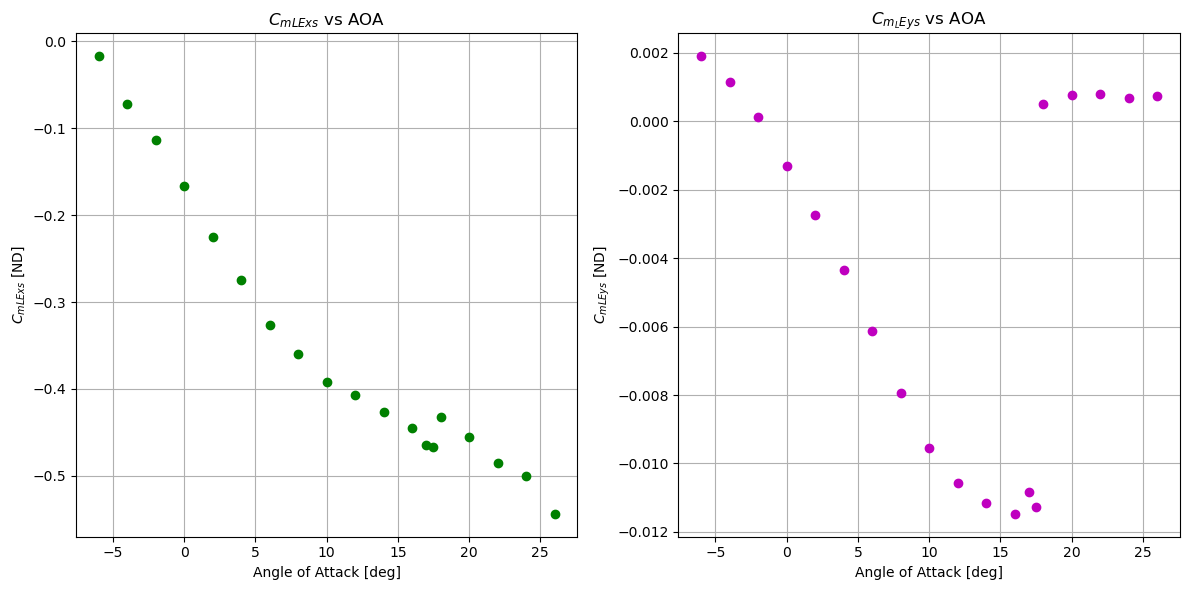

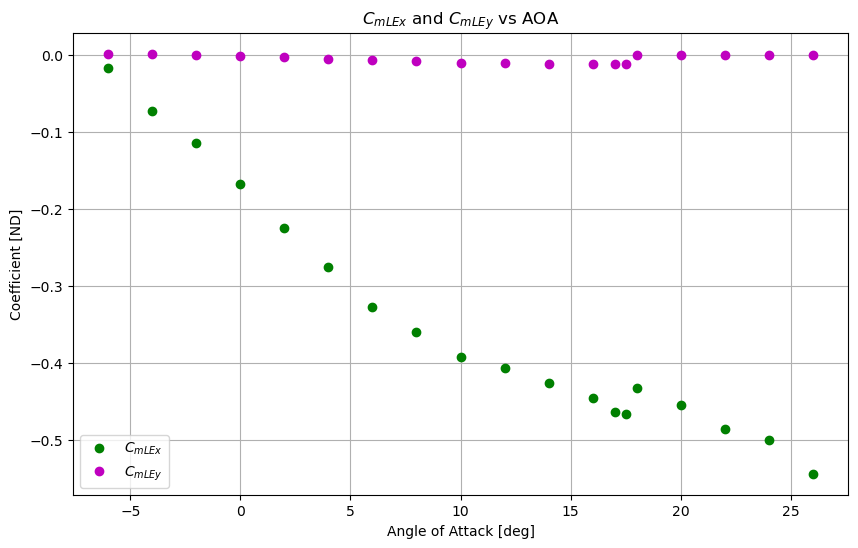

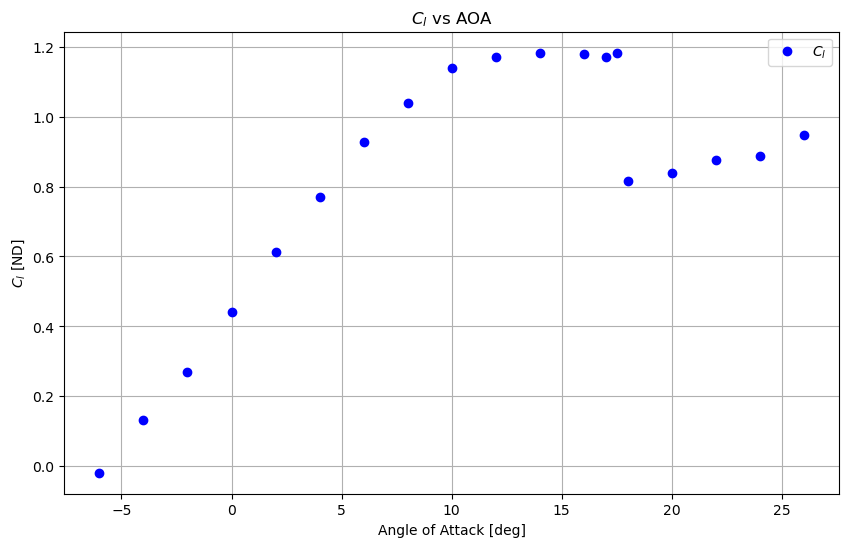

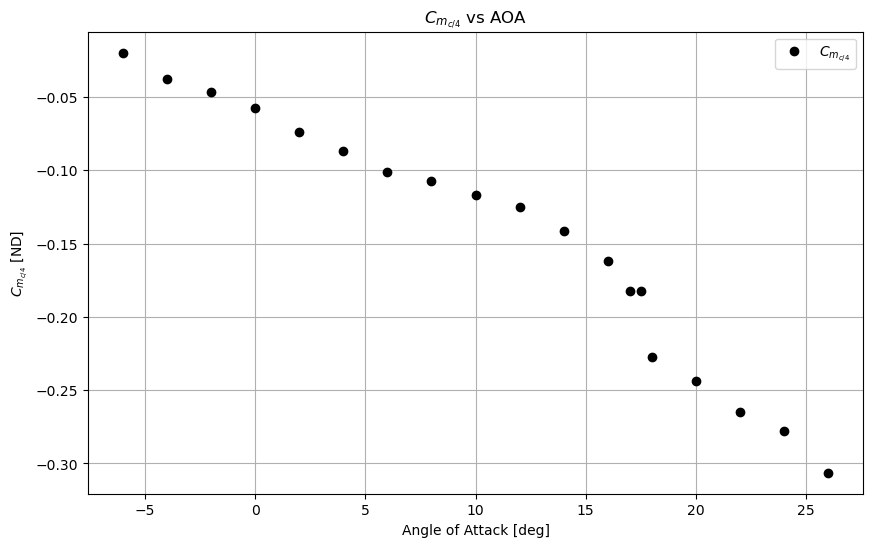

In [79]:
plt.figure(figsize=(12, 6)) 
# Plot Cns vs aoa
plt.subplot(1, 2, 1)
plt.plot(aoas.flatten(), Cns, marker='o', linestyle='', color='b')
plt.xlabel('Angle of Attack [deg]')
plt.ylabel('$C_n$ [ND]')
plt.title('$C_n$ vs AOA')
plt.grid(True)

# Plot Cas vs aoa
plt.subplot(1, 2, 2)
plt.plot(aoas.flatten(), Cas, marker='o', linestyle='', color='r')
plt.xlabel('Angle of Attack [deg]')
plt.ylabel('$C_a$ [ND]')
plt.title('$C_a$ vs AOA')
plt.grid(True)

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(aoas.flatten(), Cns, marker='o', linestyle='', color='b', label='$C_n$')
plt.plot(aoas.flatten(), Cas, marker='o', linestyle='', color='r', label='$C_a$')
plt.xlabel('Angle of Attack [deg]')
plt.ylabel('Coefficient [ND]')
plt.title('$C_n$ and $C_a$ vs AOA')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6)) 
# Plot Cm_LExs vs aoa
plt.subplot(1, 2, 1)
plt.plot(aoas.flatten(), Cm_LExs, marker='o', linestyle='', color='g')
plt.xlabel('Angle of Attack [deg]')
plt.ylabel('$C_{mLExs}$ [ND]')
plt.title('$C_{mLExs}$ vs AOA')
plt.grid(True)

# Plot Cm_LEys vs aoa
plt.subplot(1, 2, 2)
plt.plot(aoas.flatten(), Cm_LEys, marker='o', linestyle='', color='m')
plt.xlabel('Angle of Attack [deg]')
plt.ylabel('$C_{mLEys}$ [ND]')
plt.title('$C_{m_LEys}$ vs AOA')
plt.grid(True)

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(aoas.flatten(), Cm_LExs, marker='o', linestyle='', color='g', label='$C_{mLEx}$')
plt.plot(aoas.flatten(), Cm_LEys, marker='o', linestyle='', color='m', label='$C_{mLEy}$')
plt.xlabel('Angle of Attack [deg]')
plt.ylabel('Coefficient [ND]')
plt.title('$C_{mLEx}$ and $C_{mLEy}$ vs AOA')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(aoas.flatten(), Cls, marker='o', linestyle='', color='b', label='$C_l$')
plt.xlabel('Angle of Attack [deg]')
plt.ylabel('$C_l$ [ND]')
plt.title('$C_l$ vs AOA') # TODO: REMOVE BEFORE FLIGHT
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(aoas.flatten(), Cmc4, marker='o', linestyle='', color='k', label='$C_{m_{c/4}}$')
plt.xlabel('Angle of Attack [deg]')
plt.ylabel('$C_{m_{c/4}}$ [ND]')
plt.title('$C_{m_{c/4}}$ vs AOA')
plt.legend()
plt.grid(True)
plt.show()

In [110]:
data = pd.read_csv('460lab2abx_taps.csv', header=[0, 1])
data.to_latex()

'\\begin{tabular}{lrlrrrrrrrrrrrrrrrrrrrrr}\n\\toprule\n &  AOA & x/c & 1 & 0.8 & 0.7 & 0.6 & 0.5 & 0.4 & 0.3 & 0.2 & 0.1 & 0.05 & 0 & 0.05 & 0.1 & 0.2 & 0.3 & 0.4 & 0.5 & 0.6 & 0.7 & 0.8 & 1 \\\\\n &  [deg] & y/c & 0 & 0.05248 & 0.073468 & 0.090605 & 0.102701 & 0.109032 & 0.108445 & 0.10036 & 0.075339 & 0.052949 & 0 & -0.03115 & -0.03513 & -0.03548 & -0.03146 & -0.02707 & -0.02268 & -0.01828 & -0.01389 & -0.0095 & 0.1 \\\\\n\\midrule\n0 & -6.000000 & p[psid] & -0.078332 & -0.018203 & -0.020539 & -0.025904 & -0.030183 & -0.031552 & -0.028639 & -0.025139 & 0.003694 & 0.039036 & -0.062090 & -0.002447 & -0.005951 & -0.010013 & -0.014434 & -0.019516 & -0.027618 & -0.040703 & -0.069214 & -0.138461 & -0.078332 \\\\\n1 & -8.000000 & p[psid] & -0.036537 & -0.017558 & -0.021662 & -0.026973 & -0.029603 & -0.029481 & -0.025245 & -0.020429 & 0.008374 & 0.041287 & -0.013785 & -0.021207 & -0.029197 & -0.040363 & -0.048029 & -0.053874 & -0.058853 & -0.058623 & -0.056611 & -0.055515 & -0.036537 \\\\\n

In [116]:
main_data = pd.read_csv('460lab2abx_taps.csv', header=[0, 1])
# Split the main_data DataFrame into two separate DataFrames
half_index = len(main_data.columns) // 2

# First half of the columns
main_data_first_half = main_data.iloc[:, :half_index]

# Second half of the columns
main_data_second_half = main_data.iloc[:, half_index:]

# Display the two DataFrames
print("First half of the DataFrame:")
# main_data_first_half.to_latex()

# print("\nSecond half of the DataFrame:")
# print(main_data_second_half)
main_data_second_half.to_latex()

First half of the DataFrame:


'\\begin{tabular}{lrrrrrrrrrrrr}\n\\toprule\n & 0.05 & 0 & 0.05 & 0.1 & 0.2 & 0.3 & 0.4 & 0.5 & 0.6 & 0.7 & 0.8 & 1 \\\\\n & 0.052949 & 0 & -0.03115 & -0.03513 & -0.03548 & -0.03146 & -0.02707 & -0.02268 & -0.01828 & -0.01389 & -0.0095 & 0.1 \\\\\n\\midrule\n0 & 0.039036 & -0.062090 & -0.002447 & -0.005951 & -0.010013 & -0.014434 & -0.019516 & -0.027618 & -0.040703 & -0.069214 & -0.138461 & -0.078332 \\\\\n1 & 0.041287 & -0.013785 & -0.021207 & -0.029197 & -0.040363 & -0.048029 & -0.053874 & -0.058853 & -0.058623 & -0.056611 & -0.055515 & -0.036537 \\\\\n2 & 0.021585 & -0.006167 & -0.000879 & -0.003459 & -0.006628 & -0.009954 & -0.013825 & -0.020057 & -0.030322 & -0.054577 & -0.083963 & -0.053379 \\\\\n3 & 0.001288 & 0.036900 & 0.000981 & -0.000833 & -0.003024 & -0.005297 & -0.007690 & -0.012503 & -0.025202 & -0.038226 & -0.052196 & -0.035529 \\\\\n4 & -0.028537 & 0.068054 & 0.002927 & 0.001540 & 0.000063 & -0.001497 & -0.003317 & -0.006480 & -0.011736 & -0.020115 & -0.027111 & -0.0196